<b>Deep Neural Networks</b>

In [1]:

! pip install tensorflow-gpu==2.0.0-rc1
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

  Created wheel for absl-py: filename=absl_py-0.9.0-cp37-none-any.whl size=121936 sha256=9f2d3ead23a9bd386f4f8ee1fd7ca4341b23957b938b4d0c867c4653157b9f87
  Stored in directory: C:\Users\sembahen\AppData\Local\pip\Cache\wheels\8e\28\49\fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4835 sha256=47639526e7ec4dac0b3a06d7c383d5db7a7d4d55e5f976b06fbd52b70f4817ee
  Stored in directory: C:\Users\sembahen\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built absl-py termcolor


1. Loading the dataset and  preprocessing 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import time
from tensorflow.keras.datasets import fashion_mnist

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
len(y_train)

60000

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:


input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [11]:
X_train[0].shape

(784,)

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

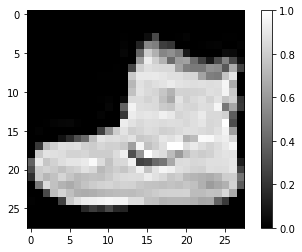

In [13]:
plt.figure()
plt.imshow(X_train[0].reshape(28,28), cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()


Visualization of the images

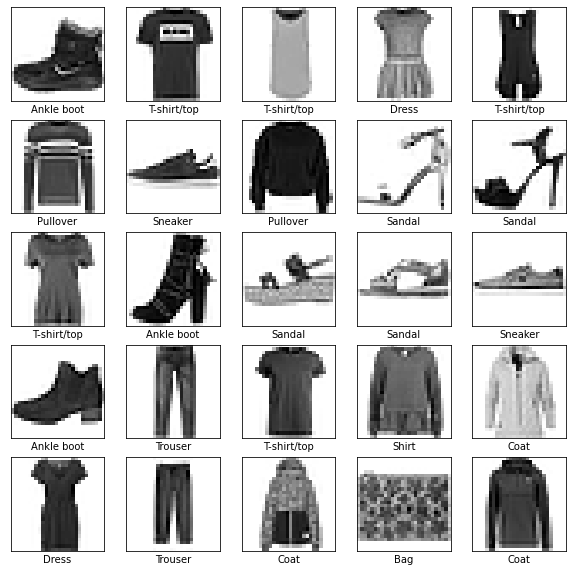

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

**<h2>Trying different number of layers</h2>**

**2 layers**

In [15]:
from tensorflow.keras.layers import Dense

model = Sequential()
# our first dense layer
model.add(Dense(1028, input_shape=(784,), activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 241us/sample - loss: 0.9770 - accuracy: 0.7031- loss: 1.042
Epoch 2/20
60000/60000 [==============================] - 9s 155us/sample - loss: 0.6425 - accuracy: 0.7950
Epoch 3/20
60000/60000 [==============================] - 10s 159us/sample - loss: 0.5689 - accuracy: 0.8148- loss: 0.5700 - accuracy
Epoch 4/20
60000/60000 [==============================] - 10s 159us/sample - loss: 0.5302 - accuracy: 0.8252
Epoch 5/20
60000/60000 [==============================] - 10s 166us/sample - loss: 0.5044 - accuracy: 0.8323- loss: 0.5040 - accuracy: 
Epoch 6/20
60000/60000 [==============================] - 11s 175us/sample - loss: 0.4861 - accuracy: 0.8368
Epoch 7/20
60000/60000 [==============================] - 10s 170us/sample - loss: 0.4718 - accuracy: 0.8412
Epoch 8/20
60000/60000 [==============================] - 10s 172us/sample - loss: 0.4605 - accuracy: 0.8437
Epoch 9/20
60000/60000 [=================

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.4257104769706726
Test accuracy: 0.8516


**3 layers**

In [17]:
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(512, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 311us/sample - loss: 0.9507 - accuracy: 0.7221
Epoch 2/20
60000/60000 [==============================] - 18s 304us/sample - loss: 0.5907 - accuracy: 0.8096
Epoch 3/20
60000/60000 [==============================] - 18s 302us/sample - loss: 0.5194 - accuracy: 0.8278
Epoch 4/20
60000/60000 [==============================] - 19s 317us/sample - loss: 0.4861 - accuracy: 0.8353
Epoch 5/20
60000/60000 [==============================] - 19s 316us/sample - loss: 0.4627 - accuracy: 0.8415
Epoch 6/20
60000/60000 [==============================] - 18s 298us/sample - loss: 0.4470 - accuracy: 0.8467
Epoch 7/20
60000/60000 [==============================] - 18s 303us/sample - loss: 0.4329 - accuracy: 0.8500
Epoch 8/20
60000/60000 [==============================] - 18s 299us/sample - loss: 0.4229 - accuracy: 0.8532
Epoch 9/20
60000/60000 [==============================] - 18s 294us/sample - loss: 0.4132 - accuracy: 0.8

In [18]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3924175757408142
Test accuracy: 0.8605


**4 layers**

In [19]:
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(512, activation="relu"))
# our third dense layer
model.add(Dense(256, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 369us/sample - loss: 0.9840 - accuracy: 0.6969
Epoch 2/20
60000/60000 [==============================] - 19s 321us/sample - loss: 0.5814 - accuracy: 0.8058- loss: 0.5
Epoch 3/20
60000/60000 [==============================] - 20s 334us/sample - loss: 0.5084 - accuracy: 0.8249
Epoch 4/20
60000/60000 [==============================] - 20s 329us/sample - loss: 0.4743 - accuracy: 0.8356
Epoch 5/20
60000/60000 [==============================] - 19s 324us/sample - loss: 0.4501 - accuracy: 0.8419
Epoch 6/20
60000/60000 [==============================] - ETA: 0s - loss: 0.4337 - accuracy: 0.84 - 20s 335us/sample - loss: 0.4335 - accuracy: 0.8487
Epoch 7/20
60000/60000 [==============================] - 20s 330us/sample - loss: 0.4182 - accuracy: 0.8537
Epoch 8/20
60000/60000 [==============================] - 19s 321us/sample - loss: 0.4077 - accuracy: 0.8571
Epoch 9/20
60000/60000 [============================

In [20]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.38921296634674074
Test accuracy: 0.8607


<b>Comparison</b>
<p>Based purely on the test accuracy,the model with 3 layers performed best. However , comparing the performance on the training and test set, the model with 2 layers performed best</p>

**<h2>Trying different activation functions</h2>**

**activation function=tanh**

In [21]:
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(512, activation="tanh"))
# our third dense layer
model.add(Dense(256, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 351us/sample - loss: 0.7626 - accuracy: 0.7526
Epoch 2/20
60000/60000 [==============================] - 20s 332us/sample - loss: 0.5215 - accuracy: 0.8219
Epoch 3/20
60000/60000 [==============================] - 19s 323us/sample - loss: 0.4733 - accuracy: 0.8351
Epoch 4/20
60000/60000 [==============================] - 20s 326us/sample - loss: 0.4482 - accuracy: 0.8413
Epoch 5/20
60000/60000 [==============================] - 20s 331us/sample - loss: 0.4310 - accuracy: 0.8483
Epoch 6/20
60000/60000 [==============================] - 20s 331us/sample - loss: 0.4187 - accuracy: 0.8523
Epoch 7/20
60000/60000 [==============================] - 20s 334us/sample - loss: 0.4088 - accuracy: 0.8553
Epoch 8/20
60000/60000 [==============================] - 20s 327us/sample - loss: 0.4005 - accuracy: 0.8575
Epoch 9/20
60000/60000 [==============================] - 20s 330us/sample - loss: 0.3919 - accuracy: 0.8

In [22]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3935245877981186
Test accuracy: 0.8588


**activation function=sigmoid**

In [23]:
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(784,), activation="sigmoid"))
# our second dense layer
model.add(Dense(512, activation="sigmoid"))
# our third dense layer
model.add(Dense(256, activation="sigmoid"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 345us/sample - loss: 2.2983 - accuracy: 0.1350
Epoch 2/20
60000/60000 [==============================] - 20s 329us/sample - loss: 2.2748 - accuracy: 0.2113
Epoch 3/20
60000/60000 [==============================] - 20s 340us/sample - loss: 2.2471 - accuracy: 0.3034- loss: 2.2477 - accuracy: 0. - ETA: 0s - loss: 2.2476 - ac
Epoch 4/20
60000/60000 [==============================] - 19s 322us/sample - loss: 2.2017 - accuracy: 0.3947
Epoch 5/20
60000/60000 [==============================] - 20s 336us/sample - loss: 2.1160 - accuracy: 0.4376
Epoch 6/20
60000/60000 [==============================] - 20s 334us/sample - loss: 1.9581 - accuracy: 0.4699
Epoch 7/20
60000/60000 [==============================] - 19s 324us/sample - loss: 1.7528 - accuracy: 0.4975
Epoch 8/20
60000/60000 [==============================] - 20s 332us/sample - loss: 1.5749 - accuracy: 0.5199
Epoch 9/20
60000/60000 [======================

In [24]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.8868276880264282
Test accuracy: 0.678


**activation function=relu**

In [25]:
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(512, activation="relu"))
# our third dense layer
model.add(Dense(256, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 346us/sample - loss: 0.9657 - accuracy: 0.7080
Epoch 2/20
60000/60000 [==============================] - 19s 325us/sample - loss: 0.5790 - accuracy: 0.8067
Epoch 3/20
60000/60000 [==============================] - 20s 329us/sample - loss: 0.5096 - accuracy: 0.8251
Epoch 4/20
60000/60000 [==============================] - 20s 329us/sample - loss: 0.4739 - accuracy: 0.8364
Epoch 5/20
60000/60000 [==============================] - 20s 333us/sample - loss: 0.4505 - accuracy: 0.8431
Epoch 6/20
60000/60000 [==============================] - 20s 327us/sample - loss: 0.4329 - accuracy: 0.8497
Epoch 7/20
60000/60000 [==============================] - 20s 333us/sample - loss: 0.4198 - accuracy: 0.8540
Epoch 8/20
60000/60000 [==============================] - 19s 320us/sample - loss: 0.4071 - accuracy: 0.8581
Epoch 9/20
60000/60000 [==============================] - 20s 328us/sample - loss: 0.3978 - accuracy: 0.8

In [26]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3826176045179367
Test accuracy: 0.8613


<b>Comparison</b>
<p>Relu activation function seemed to perform best. The second best performer was tanh and sigmoid was the third. The sigmoid has a high performance on the test set but a low performance on the training.</p>

**<h2>Trying different number of neurons</h2>**

 **neurons =1024,512,256,10**

In [27]:
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(512, activation="relu"))
# our third dense layer
model.add(Dense(256, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 349us/sample - loss: 0.9412 - accuracy: 0.7149
Epoch 2/20
60000/60000 [==============================] - 20s 339us/sample - loss: 0.5637 - accuracy: 0.8109
Epoch 3/20
60000/60000 [==============================] - 20s 333us/sample - loss: 0.4989 - accuracy: 0.8282
Epoch 4/20
60000/60000 [==============================] - 20s 337us/sample - loss: 0.4678 - accuracy: 0.8375
Epoch 5/20
60000/60000 [==============================] - 20s 334us/sample - loss: 0.4473 - accuracy: 0.8443
Epoch 6/20
60000/60000 [==============================] - 19s 325us/sample - loss: 0.4290 - accuracy: 0.8507
Epoch 7/20
60000/60000 [==============================] - 20s 339us/sample - loss: 0.4144 - accuracy: 0.8558
Epoch 8/20
60000/60000 [==============================] - 20s 334us/sample - loss: 0.4038 - accuracy: 0.8594
Epoch 9/20
60000/60000 [==============================] - 20s 327us/sample - loss: 0.3932 - accuracy: 0.8

In [28]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3732243008136749
Test accuracy: 0.8646


 **neurons =512,256,128,10**

In [29]:
model = Sequential()
# our first dense layer
model.add(Dense(512, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(256, activation="relu"))
# our third dense layer
model.add(Dense(128, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 157us/sample - loss: 1.0109 - accuracy: 0.6910
Epoch 2/20
60000/60000 [==============================] - 9s 144us/sample - loss: 0.5845 - accuracy: 0.8041
Epoch 3/20
60000/60000 [==============================] - 9s 148us/sample - loss: 0.5133 - accuracy: 0.8219
Epoch 4/20
60000/60000 [==============================] - 8s 140us/sample - loss: 0.4823 - accuracy: 0.8316
Epoch 5/20
60000/60000 [==============================] - 9s 144us/sample - loss: 0.4583 - accuracy: 0.8405
Epoch 6/20
60000/60000 [==============================] - 9s 143us/sample - loss: 0.4402 - accuracy: 0.8469
Epoch 7/20
60000/60000 [==============================] - 8s 140us/sample - loss: 0.4241 - accuracy: 0.8519
Epoch 8/20
60000/60000 [==============================] - 8s 139us/sample - loss: 0.4154 - accuracy: 0.8560
Epoch 9/20
60000/60000 [==============================] - 9s 142us/sample - loss: 0.4048 - accuracy: 0.8583
Epoch

In [30]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.38837714858055117
Test accuracy: 0.8585


 **neurons =256,128,64,10**

In [31]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(128, activation="relu"))
# our third dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/sample - loss: 1.0739 - accuracy: 0.6658
Epoch 2/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.6188 - accuracy: 0.7912
Epoch 3/20
60000/60000 [==============================] - 6s 97us/sample - loss: 0.5362 - accuracy: 0.8151s
Epoch 4/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4964 - accuracy: 0.8267
Epoch 5/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4706 - accuracy: 0.8349
Epoch 6/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4523 - accuracy: 0.8403
Epoch 7/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4369 - accuracy: 0.8475
Epoch 8/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4269 - accuracy: 0.8493
Epoch 9/20
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4145 - accuracy: 0.8541
Epoch 10/20

In [32]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3910407332897186
Test accuracy: 0.8604


<b>Comparison</b>
<p>The results from using 1024,512,256,10 and using 512,256,128,10 are very similar for both training and testing. These results were also higher than those from using 256,128,64,10.</p>

**<h2>Different batch sizes during training.</h2>**

**minibatch size=8**

In [33]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(128, activation="relu"))
# our third dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=8, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 41s 690us/sample - loss: 0.5512 - accuracy: 0.8045
Epoch 2/20
60000/60000 [==============================] - 40s 659us/sample - loss: 0.3941 - accuracy: 0.8559
Epoch 3/20
60000/60000 [==============================] - 41s 676us/sample - loss: 0.3531 - accuracy: 0.8706
Epoch 4/20
60000/60000 [==============================] - 42s 694us/sample - loss: 0.3273 - accuracy: 0.8797
Epoch 5/20
60000/60000 [==============================] - 39s 653us/sample - loss: 0.3085 - accuracy: 0.8844
Epoch 6/20
60000/60000 [==============================] - 40s 660us/sample - loss: 0.2932 - accuracy: 0.8904
Epoch 7/20
60000/60000 [==============================] - 40s 666us/sample - loss: 0.2802 - accuracy: 0.8936
Epoch 8/20
60000/60000 [==============================] - 39s 649us/sample - loss: 0.2679 - accuracy: 0.8999
Epoch 9/20
60000/60000 [==============================] - 38s 640us/sample - loss: 0.2597 - accuracy: 0.9

In [34]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.32388387467861174
Test accuracy: 0.8914


**minibatch size=128**

In [35]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(128, activation="relu"))
# our third dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/sample - loss: 1.0849 - accuracy: 0.6758
Epoch 2/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.6038 - accuracy: 0.7973
Epoch 3/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5259 - accuracy: 0.8189
Epoch 4/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4888 - accuracy: 0.8298
Epoch 5/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4662 - accuracy: 0.8364
Epoch 6/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4458 - accuracy: 0.8436
Epoch 7/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4327 - accuracy: 0.8480
Epoch 8/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4205 - accuracy: 0.8529
Epoch 9/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4090 - accuracy: 0.8578
Epoch 10/20
60

In [36]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.38489504384994505
Test accuracy: 0.8644


**full batch size**

In [37]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(128, activation="relu"))
# our third dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, X_train.shape[0], epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 247us/sample - loss: 2.3608 - accuracy: 0.1181
Epoch 2/20
60000/60000 [==============================] - 3s 57us/sample - loss: 2.3402 - accuracy: 0.1232
Epoch 3/20
60000/60000 [==============================] - 2s 34us/sample - loss: 2.3215 - accuracy: 0.1284
Epoch 4/20
60000/60000 [==============================] - 2s 37us/sample - loss: 2.3041 - accuracy: 0.1338
Epoch 5/20
60000/60000 [==============================] - 2s 33us/sample - loss: 2.2877 - accuracy: 0.1384
Epoch 6/20
60000/60000 [==============================] - 2s 31us/sample - loss: 2.2722 - accuracy: 0.1429
Epoch 7/20
60000/60000 [==============================] - 2s 30us/sample - loss: 2.2574 - accuracy: 0.1482
Epoch 8/20
60000/60000 [==============================] - 2s 32us/sample - loss: 2.2431 - accuracy: 0.1539
Epoch 9/20
60000/60000 [==============================] - 2s 31us/sample - loss: 2.2294 - accuracy: 0.1612
Epoch 10/20


In [38]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 2.090490839767456
Test accuracy: 0.3249


<b>Comparison</b>
<p>The model that performed best with regard to the test data was when the batch size was 8. However when both the performance on the training set and test set are put into consideration, the 128 batch size was the best. Using the full batch size produced the worst results both with the training and testing  </p>